In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## LLM

In [11]:
# Define the models and benchmarks
models = [
    'GPT-3.5-Turbo', 
    'GPT-3.5-Turbo Abstract Algebra Finetuned', 
    'GPT-3.5-Turbo Combined Finetuned', 
]

# Define the benchmarks
benchmarks = [
    'MMLU Abstract Algebra', 
    'Linear Algebra QA', 
    'Linear Algebra Theorem QA',
    'MATH Linear Algebra'
]

# Create a DataFrame where each model has all four benchmarks
data = {
    'Model': [model for model in models for _ in range(len(benchmarks))],
    'Benchmark': benchmarks * len(models),
    'Accuracy': [0.22, 0.3184, 0.0962, 0.086, 0.23, 0.3498, 0.1731, 0.089, 0.26, 0.2422, 0.25, 0.1065]
}

# Create the DataFrame
GPT = pd.DataFrame(data)


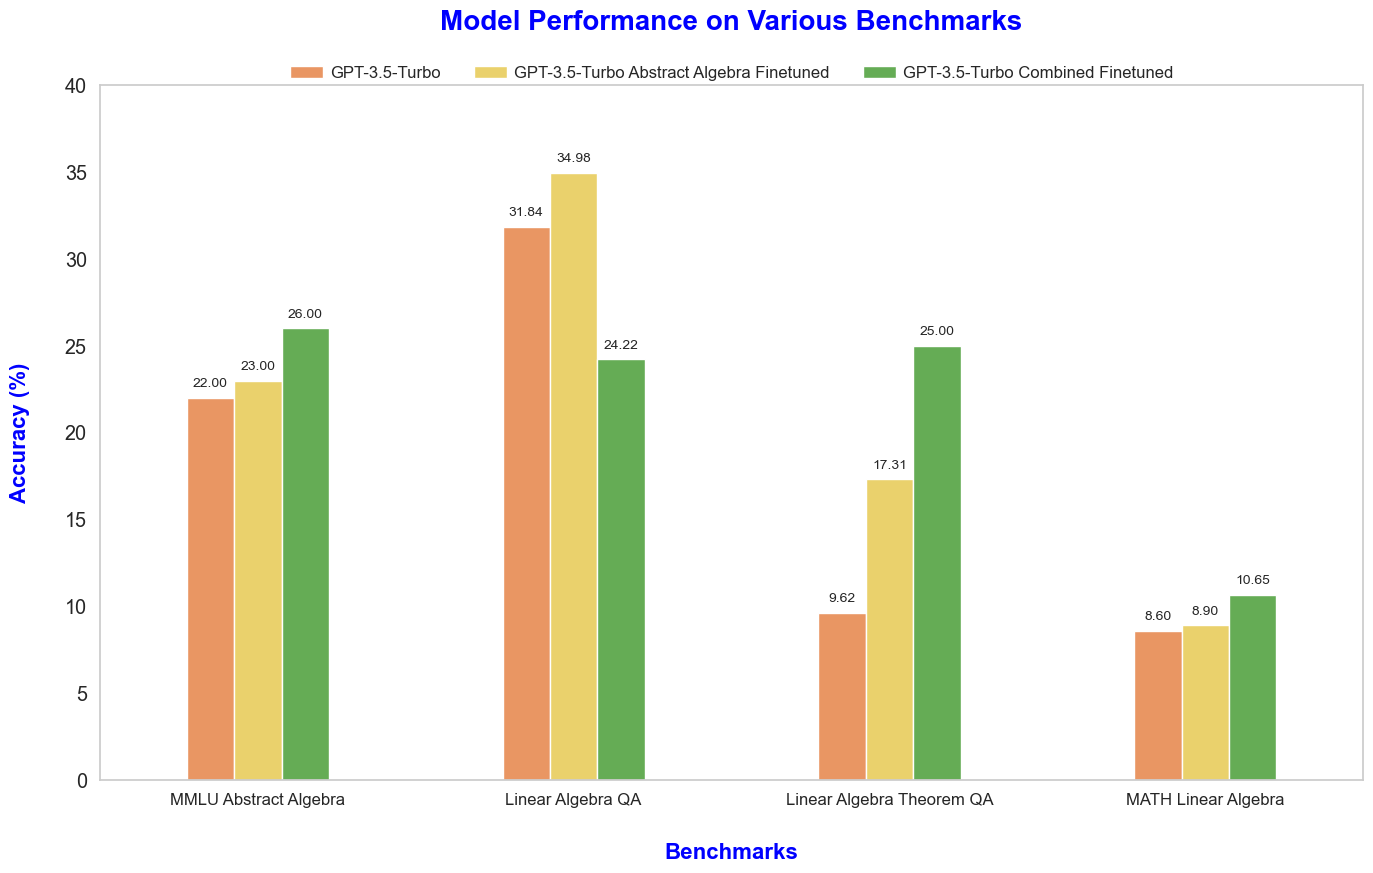

In [94]:
plt.figure(figsize=(14, 9))

palette = ['#FF914D', '#FFDD57', '#5CBA47', '#69D2E7', '#F07CBB']
sns.barplot(
    x='Benchmark', 
    y='Accuracy', 
    hue='Model', 
    data=GPT, 
    palette=palette, 
    dodge=True, 
    edgecolor='white',
    width=0.45  
)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height() * 100:.2f}',  
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), 
                       textcoords='offset points', fontsize=10)

plt.title('Model Performance on Various Benchmarks', fontsize=20, pad = 40 ,weight='bold', color = 'blue')
plt.xlabel('Benchmarks', fontsize=16,labelpad=25, weight='bold', color='blue')
plt.ylabel('Accuracy (%)', fontsize=16, labelpad=25, weight='bold', color='blue')  

plt.xticks(fontsize = 12)
plt.yticks(ticks=plt.gca().get_yticks(), labels=[f'{int(tick * 100)}' for tick in plt.gca().get_yticks()])


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=12, frameon=False, 
           ncol=len(GPT['Model'].unique()), handletextpad=0.4)
plt.grid(False)
plt.tight_layout()

# Save figure
plt.savefig('GPT-3.5-Turbo_Performance_on_Various_Benchmarks.png')

plt.show()

## SLMs

In [18]:
models = [
    'LLAMA-2-7B', 
    'LLAMA-2-13B', 
    'MISTRAL-7B-v0.1', 
    'BLOOM-7B1',
    'Finetuned-LLAMA-2-7B',
    'Finetuned-LLAMA-2-13B',
    'Finetuned-MISTRAL-7B-v0.1',
    'Finetuned-BLOOM-7B1'
]

# Define the benchmarks
benchmarks = [
    'Linear Algebra QA', 
    'MATH Linear Algebra'
]

# Create a DataFrame where each model has all four benchmarks
data = {
    'Model': [model for model in models for _ in range(len(benchmarks))],
    'Benchmark': benchmarks * len(models),
    'Accuracy (%)': [5.83, 0.30, 8.07, 1.05, 14.80, 1.95, 0.90, 0.00,
                     8.52, 1.55, 12.11, 2.45, 26.91, 7.85, 2.24, 0.45]
}

# Create the DataFrame
SLM = pd.DataFrame(data)

LAQ = SLM[SLM['Benchmark'] == 'Linear Algebra QA']
MLA = SLM[SLM['Benchmark'] == 'MATH Linear Algebra']

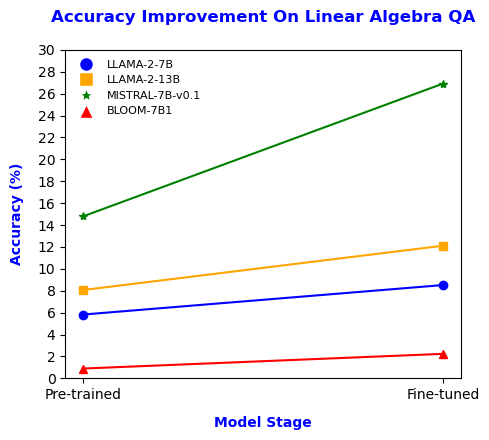

In [101]:
model_pairs = [
    ("LLAMA-2-7B", "Finetuned-LLAMA-2-7B"),
    ("LLAMA-2-13B", "Finetuned-LLAMA-2-13B"),
    ("MISTRAL-7B-v0.1", "Finetuned-MISTRAL-7B-v0.1"),
    ("BLOOM-7B1", "Finetuned-BLOOM-7B1")
]


plt.figure(figsize=(5, 4.5))

markers = ['o', 's', '*', '^']  
colors = ['blue', 'orange', 'green', 'red']  
labels = ['LLAMA-2-7B', 'LLAMA-2-13B', 'MISTRAL-7B-v0.1', 'BLOOM-7B1']  

# Plot the data
for idx, (pre_model, finetuned_model) in enumerate(model_pairs, start=1):
    subset = LAQ[LAQ["Model"].isin([pre_model, finetuned_model])]
    subset["X-axis"] = [1, 2]  
    
    plt.plot(
        subset["X-axis"],
        subset["Accuracy (%)"],
        marker=markers[idx - 1],
        color=colors[idx - 1],
        label=f'{pre_model}'
    )

plt.xticks([1, 2], ["Pre-trained", "Fine-tuned"], fontsize=10)

plt.ylim(0, 30)
plt.yticks(range(0, 31, 2))

plt.title('Accuracy Improvement On Linear Algebra QA', fontsize=12, pad=20, weight='bold', color='blue')
plt.xlabel('Model Stage', fontsize=10, labelpad=10, weight='bold', color='blue')
plt.ylabel('Accuracy (%)', fontsize=10, labelpad=10, weight='bold', color='blue')

legend_elements = [
    Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(len(labels))
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=8, frameon=False)
plt.grid(False)
plt.tight_layout()  

plt.savefig('Accuracy_Improvement_of_QA.png')
plt.show()

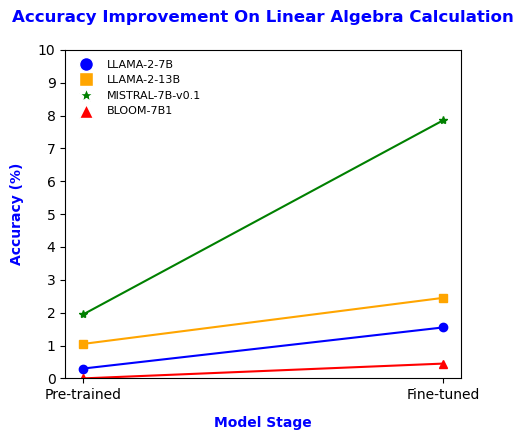

In [102]:
plt.figure(figsize=(5, 4.5))

markers = ['o', 's', '*', '^']  
colors = ['blue', 'orange', 'green', 'red']  
labels = ['LLAMA-2-7B', 'LLAMA-2-13B', 'MISTRAL-7B-v0.1', 'BLOOM-7B1']  

# Plot the data
for idx, (pre_model, finetuned_model) in enumerate(model_pairs, start=1):
    subset = MLA[MLA["Model"].isin([pre_model, finetuned_model])]
    subset["X-axis"] = [1, 2]  
    
    plt.plot(
        subset["X-axis"],
        subset["Accuracy (%)"],
        marker=markers[idx - 1],
        color=colors[idx - 1],
        label=f'{pre_model}'
    )

plt.xticks([1, 2], ["Pre-trained", "Fine-tuned"], fontsize=10)

plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))

plt.title('Accuracy Improvement On Linear Algebra Calculation', fontsize=12, pad=20, weight='bold', color='blue')
plt.xlabel('Model Stage', fontsize=10, labelpad=10, weight='bold', color='blue')
plt.ylabel('Accuracy (%)', fontsize=10, labelpad=10, weight='bold', color='blue')

legend_elements = [
    Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(len(labels))
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=8, frameon=False)
plt.grid(False)
plt.tight_layout()  

plt.savefig('Accuracy_Improvement_Calculation.png')
plt.show()

## Cost Performance

In [113]:
cost = pd.DataFrame({
    'Model': ['Finetuned-LLAMA-2-7B', 'Finetuned-LLAMA-2-13B', 'Finetuned-MISTRAL-7B-v0.1', 'Finetuned-BLOOM-7B1'],
    'Cost (in $)': [0.96,3.15,1.05, 1.05],
    'Cost (in minutes)': [32, 105, 31, 35],
    'QA Performance': [8.52, 12.11, 26.91, 2.24],
    'Calculation Performance': [1.55, 2.45, 7.85, 0.45]
})

cost

,Model,Cost (in $),Cost (in minutes),QA Performance,Calculation Performance
0,Finetuned-LLAMA-2-7B,0.96,32,8.52,1.55
1,Finetuned-LLAMA-2-13B,3.15,105,12.11,2.45
2,Finetuned-MISTRAL-7B-v0.1,1.05,31,26.91,7.85
3,Finetuned-BLOOM-7B1,1.05,35,2.24,0.45


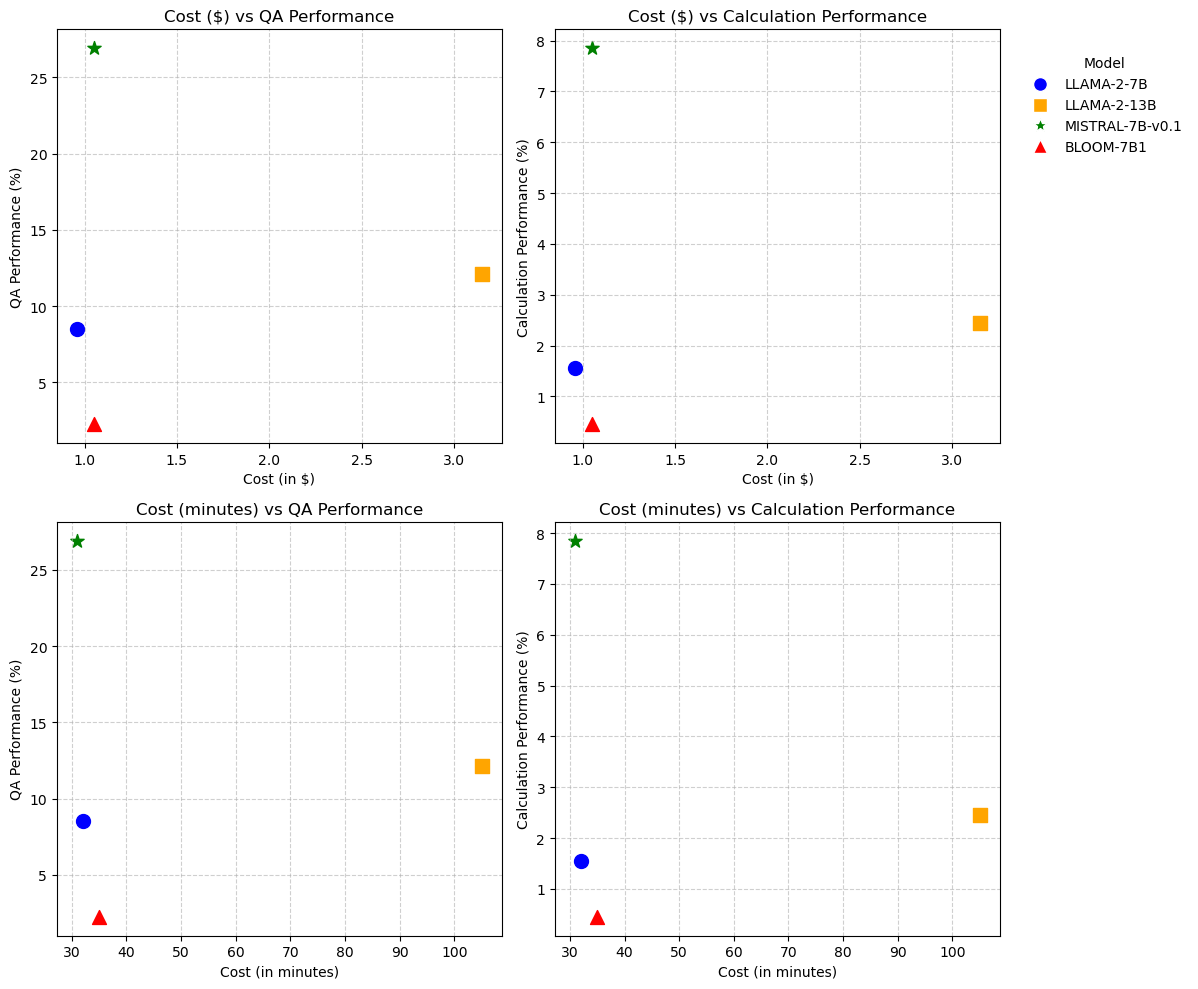

In [135]:
import matplotlib.pyplot as plt

# Define markers, colors, and labels for each model
markers = ['o', 's', '*', '^']  # Circle, Square, Star, Triangle
colors = ['blue', 'orange', 'green', 'red']  # Matching colors for each model
labels = ['LLAMA-2-7B', 'LLAMA-2-13B', 'MISTRAL-7B-v0.1', 'BLOOM-7B1']  # Model names

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False, sharey=False)

# Iterate over each model to plot their points with unique marker and color
for i, model in enumerate(cost['Model']):
    # First subplot: Money cost vs QA Performance
    axes[0, 0].scatter(
        cost['Cost (in $)'][i], cost['QA Performance'][i],
        color=colors[i], marker=markers[i], s=100
    )

    # Second subplot: Money cost vs Calculation Performance
    axes[0, 1].scatter(
        cost['Cost (in $)'][i], cost['Calculation Performance'][i],
        color=colors[i], marker=markers[i], s=100
    )

    # Third subplot: Time cost vs QA Performance
    axes[1, 0].scatter(
        cost['Cost (in minutes)'][i], cost['QA Performance'][i],
        color=colors[i], marker=markers[i], s=100
    )

    # Fourth subplot: Time cost vs Calculation Performance
    axes[1, 1].scatter(
        cost['Cost (in minutes)'][i], cost['Calculation Performance'][i],
        color=colors[i], marker=markers[i], s=100
    )

# Set titles, labels, and grids for each subplot
axes[0, 0].set_title('Cost ($) vs QA Performance', fontsize=12)
axes[0, 0].set_xlabel('Cost (in $)', fontsize=10)
axes[0, 0].set_ylabel('QA Performance (%)', fontsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

axes[0, 1].set_title('Cost ($) vs Calculation Performance', fontsize=12)
axes[0, 1].set_xlabel('Cost (in $)', fontsize=10)
axes[0, 1].set_ylabel('Calculation Performance (%)', fontsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

axes[1, 0].set_title('Cost (minutes) vs QA Performance', fontsize=12)
axes[1, 0].set_xlabel('Cost (in minutes)', fontsize=10)
axes[1, 0].set_ylabel('QA Performance (%)', fontsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

axes[1, 1].set_title('Cost (minutes) vs Calculation Performance', fontsize=12)
axes[1, 1].set_xlabel('Cost (in minutes)', fontsize=10)
axes[1, 1].set_ylabel('Calculation Performance (%)', fontsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

# Create a shared legend
legend_elements = [
    plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(len(labels))
]
fig.legend(
    handles=legend_elements, title='Model', fontsize=10, frameon=False, bbox_to_anchor=(1, 0.95)
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  

plt.savefig('Cost_vs_Performance.png')
plt.show()
